# Checking the Schema on the Labeled Data

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import cv2

In [177]:
# define the path
img_dir_path = '/Users/kp/Desktop/work/scratch_detection/socar_dataset/damaged_car_images/' #path of the image
label_dir_path = '/Users/kp/Desktop/work/scratch_detection/socar_dataset/bbox_labels/' #path of the label

In [178]:
# Get the name of files in a dir
img_name_list = os.listdir(img_dir_path)
label_name_list = os.listdir(label_dir_path)

print(len(img_name_list))
print(len(label_name_list))

2000
2000


In [179]:
is_damage_list = list()
pose_list = list()
damage_confidence_list = list()

num_object_list = list()
num_dent_list = list()
num_scratch_list = list()
num_confident_objs = list()
num_inconfident_objs = list()

conf_dent_list = list()
conf_scratch_list = list()
inconf_dent_list = list()
inconf_scratch_list = list()

In [231]:
shape_list = list()

for img_file_name in img_name_list:
    path = os.path.join(img_dir_path, img_file_name)
    img = cv2.imread(path)[:,:,::-1]
    img_shape = img.shape
    shape_list.append(img_shape)

In [232]:
shape_list

[(800, 600, 3),
 (1024, 1024, 3),
 (768, 1024, 3),
 (600, 800, 3),
 (800, 600, 3),
 (768, 1024, 3),
 (601, 799, 3),
 (600, 800, 3),
 (600, 800, 3),
 (1024, 768, 3),
 (1024, 768, 3),
 (768, 1024, 3),
 (600, 800, 3),
 (576, 1024, 3),
 (1024, 768, 3),
 (1024, 768, 3),
 (576, 1024, 3),
 (768, 1024, 3),
 (576, 1024, 3),
 (768, 1024, 3),
 (576, 1024, 3),
 (768, 1024, 3),
 (768, 1024, 3),
 (512, 1024, 3),
 (768, 1024, 3),
 (768, 1024, 3),
 (497, 1024, 3),
 (600, 800, 3),
 (497, 1024, 3),
 (1024, 768, 3),
 (800, 600, 3),
 (1024, 768, 3),
 (768, 1024, 3),
 (1024, 576, 3),
 (600, 800, 3),
 (1024, 768, 3),
 (576, 1024, 3),
 (1024, 768, 3),
 (1024, 1024, 3),
 (576, 1024, 3),
 (768, 1024, 3),
 (1024, 768, 3),
 (768, 1024, 3),
 (768, 1024, 3),
 (497, 1024, 3),
 (768, 1024, 3),
 (600, 800, 3),
 (768, 1024, 3),
 (768, 1024, 3),
 (1024, 1024, 3),
 (768, 1024, 3),
 (800, 600, 3),
 (600, 800, 3),
 (600, 800, 3),
 (600, 800, 3),
 (800, 600, 3),
 (1024, 768, 3),
 (800, 600, 3),
 (600, 800, 3),
 (768, 1024,

In [180]:
for label_file_name in label_name_list: # iterate every files

    with open(os.path.join(label_dir_path, label_file_name), 'r') as f:
        label_dict = json.load(f)

        is_damage_label = label_dict['damage']
        is_damage_label = int(is_damage_label)
        is_damage_list.append(is_damage_label)

        pose_label = label_dict['picture_position']
        pose_label = int(pose_label)
        pose_list.append(pose_label)
        
        damage_confidence = label_dict['damage_confidence']
        damage_confidence = int(damage_confidence)
        damage_confidence_list.append(damage_confidence)
        
        ## Object Analysis
        object_list = label_dict['objects']
        num_objects = len(object_list) #number of objects in a single image
        num_object_list.append(num_objects)
        
        _tmp_class_list = list()
        _tmp_confidence_list = list()
        
        num_conf_dent = 0
        num_inconf_dent = 0
        num_conf_scratch = 0
        num_inconf_scratch = 0
        
        # iterate every polygons in the label
        for segment in object_list:
            
            class_name = segment['class_name']
            class_name = int(class_name)
            _tmp_class_list.append(class_name)
            
            class_confidence = segment['class_confidence']
            class_confidence = int(class_confidence)
            _tmp_confidence_list.append(class_confidence)
            
            
            if class_name == 1 and class_confidence == 0:
                num_inconf_dent = num_inconf_dent + 1
                
            elif class_name == 1 and class_confidence == 1:
                num_conf_dent = num_conf_dent + 1
                
            elif class_name == 2 and class_confidence == 0:
                num_inconf_scratch = num_inconf_scratch + 1
                
            elif class_name == 2 and class_confidence == 1:
                num_conf_scratch = num_conf_scratch + 1
            
        num_dent_list.append(_tmp_class_list.count(1)) #전체 손상 중 dent 개수
        num_scratch_list.append(_tmp_class_list.count(2)) #전체 손상 중 scratch 개수
        num_confident_objs.append(_tmp_confidence_list.count(1)) #전체 손상 중 confident한 손상 개수
        num_inconfident_objs.append(_tmp_confidence_list.count(0)) #전체 손상 중 inconfident한 손상 개수
        
        conf_dent_list.append(num_conf_dent) #확실한 dent 개수
        conf_scratch_list.append(num_conf_scratch) #확실한 scratch 개수
        inconf_dent_list.append(num_inconf_dent) #미확실한 dent 개수
        inconf_scratch_list.append(num_inconf_scratch) #미확실한 scratch 개수

In [181]:
'''
print(len(is_damage_list))
print(len(pose_list))
print(len(damage_confidence_list))
print(len(num_object_list))
print(len(num_dent_list)) 
print(len(num_scratch_list)) 
print(len(num_confident_objs))
print(len(num_inconfident_objs))
'''

'\nprint(len(is_damage_list))\nprint(len(pose_list))\nprint(len(damage_confidence_list))\nprint(len(num_object_list))\nprint(len(num_dent_list)) \nprint(len(num_scratch_list)) \nprint(len(num_confident_objs))\nprint(len(num_inconfident_objs))\n'

In [239]:
schema_dict = {
    'img_name':img_name_list, #이미지 이름
    'is_damage':is_damage_list, #손상 여부 - 0:미손상 / 1:손상
    'damage_confidence':damage_confidence_list, #손상 확실여부 - 0:미확실 / 1:확실
    'pose': pose_list,
    
    'shape': shape_list,
    
    'num_object':num_object_list, #객체 개수
    'num_dent':num_dent_list, #dent 개수
    'num_scratch':num_scratch_list, #scratch 개수
    'num_confident_objs':num_confident_objs, #확실한 객체의 개수
    'num_inconfident_objs':num_inconfident_objs, #미확실한 객체의 개수
    
    'num_conf_dent':conf_dent_list, #확실한 dent 수
    'num_inconf_dent':inconf_dent_list, #미확실한 dent 수
    'num_conf_scratch':conf_scratch_list, #확실한 scratch 수
    'num_inconf_scratch':inconf_scratch_list #미확실한 scratch 수
}

In [240]:
schema_df = pd.DataFrame(schema_dict)

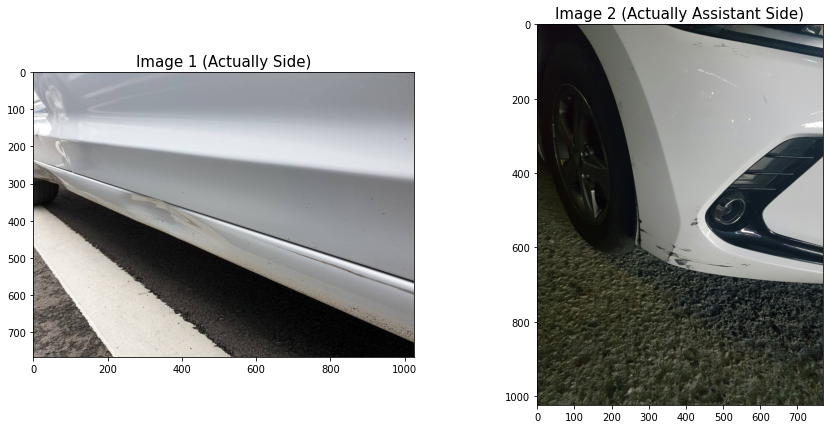

In [241]:
filename_1 = schema_df[schema_df['pose']==2].iloc[0][0]
filename_2 = schema_df[schema_df['pose']==2].iloc[10][0]

path_1 = os.path.join(img_dir_path, filename_1)
path_2 = os.path.join(img_dir_path, filename_2)
img_1 = cv2.imread(path_1)[:,:,::-1]
img_2 = cv2.imread(path_2)[:,:,::-1]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Image 1 (Actually Side)', fontsize=15)
plt.imshow(img_1)

plt.subplot(122)
plt.title('Image 2 (Actually Assistant Side)', fontsize=15)
plt.imshow(img_2)

In [242]:
#save schema to csv
schema_df.to_csv('./schema.csv')

In [251]:
#shape
#plt.figure(figsize=(20,10))
#plt.title('Image Shape', fontsize=15)
unique_sizes = np.unique(np.asarray(schema_df['shape']))
unique_sizes

array([(484, 1024, 3), (487, 1024, 3), (497, 1024, 3), (512, 1024, 3),
       (528, 1024, 3), (575, 1024, 3), (576, 1024, 3), (600, 800, 3),
       (601, 799, 3), (767, 1024, 3), (768, 1024, 3), (800, 600, 3),
       (1024, 484, 3), (1024, 487, 3), (1024, 497, 3), (1024, 512, 3),
       (1024, 576, 3), (1024, 767, 3), (1024, 768, 3), (1024, 1024, 3)],
      dtype=object)

Text(0, 0.5, 'Number of Images')

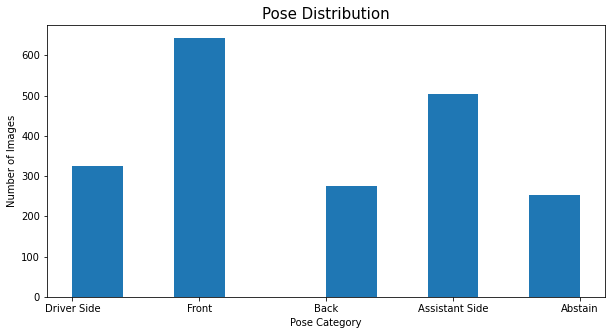

In [244]:
#pose
plt.figure(figsize=(10,5))
plt.title('Pose Distribution', fontsize=15)
target_col = np.asarray(schema_df['pose'].apply(lambda x: str(x)))

tmp_col = list()
for target in target_col:
    if target == '0':
        tmp_col.append('Abstain')
        
    elif target == '1':
        tmp_col.append('Front')
        
    elif target == '2':
        tmp_col.append('Back')
        
    elif target == '3':
        tmp_col.append('Driver Side')
        
    elif target == '4':
        tmp_col.append('Assistant Side')
        
    elif target == '5':
        tmp_col.append('Inside')

#sns.distplot(target_col, kde=False)
plt.hist(tmp_col)
plt.xlabel('Pose Category')
plt.ylabel('Number of Images')

is_damge- 0:  1799
is_damge- 1:  201


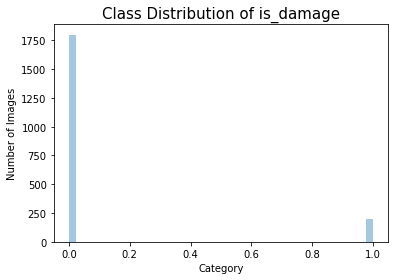

In [236]:
#is_damage
plt.title('Class Distribution of is_damage', fontsize=15)
target_col = np.asarray(schema_df['is_damage'].apply(lambda x: str(x)))
sns.distplot(target_col, kde=False)
plt.xlabel('Category')
plt.ylabel('Number of Images')

print('is_damge- 0: ', str(len(schema_df[schema_df['is_damage']==0])))
print('is_damge- 1: ', str(len(schema_df[schema_df['is_damage']==1])))

inconfident - 0:  163
confident - 1:  1837


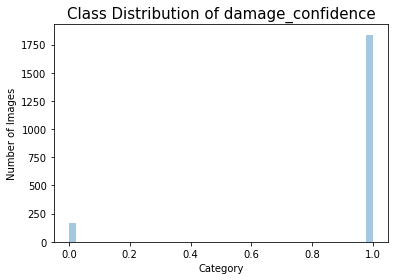

In [160]:
#is_damage
plt.title('Class Distribution of damage_confidence', fontsize=15)
target_col = np.asarray(schema_df['damage_confidence'].apply(lambda x: str(x)))
sns.distplot(target_col, kde=False)
plt.xlabel('Category')
plt.ylabel('Number of Images')

print('inconfident - 0: ', str(len(schema_df[schema_df['damage_confidence']==0])))
print('confident - 1: ', str(len(schema_df[schema_df['damage_confidence']==1])))

Avg:  5.807
Max:  45
Min:  0


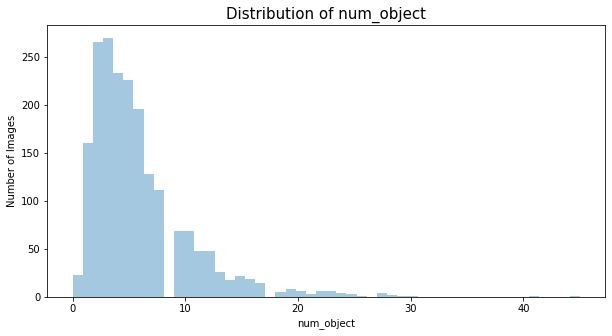

In [168]:
#num_objects
target_element = 'num_object'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
sns.distplot(schema_df[target_element], kde=False)
#plt.hist(schema_df[target_element])

plt.ylabel('Number of Images')
print('Avg: ', schema_df[target_element].mean())
print('Max: ', schema_df[target_element].max())
print('Min: ', schema_df[target_element].min())

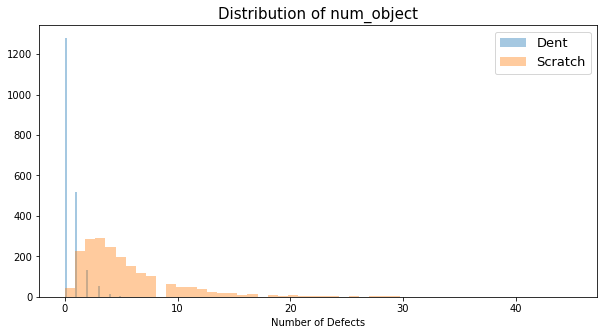

In [174]:
#num_objects
target_element = 'num_object'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
dent = schema_df['num_dent']
scratch = schema_df['num_scratch']

sns.distplot(dent, kde=False, label='Dent')
sns.distplot(scratch, kde=False, label='Scratch')
plt.xlabel('Number of Defects')
plt.legend(fontsize=13)

Max:  5
Min:  0


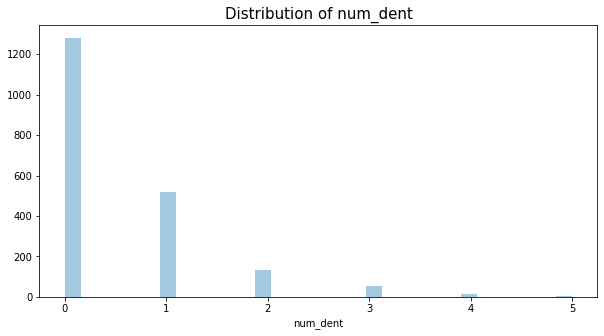

In [140]:
#num_dent
target_element = 'num_dent'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
sns.distplot(schema_df[target_element], kde=False)

print('Max: ', schema_df[target_element].max())
print('Min: ', schema_df[target_element].min())

Max:  45
Min:  0


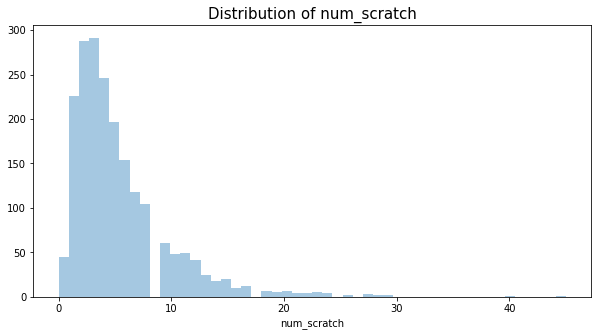

In [150]:
#num_scratch
target_element = 'num_scratch'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
#plt.hist(schema_df[target_element])
sns.distplot(schema_df[target_element], kde=False)

print('Max: ', schema_df[target_element].max())
print('Min: ', schema_df[target_element].min())

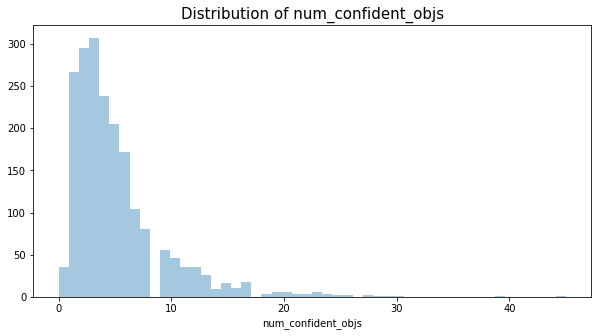

In [149]:
#num_scratch
target_element = 'num_confident_objs'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
#plt.hist(schema_df[target_element])
sns.distplot(schema_df[target_element], kde=False)

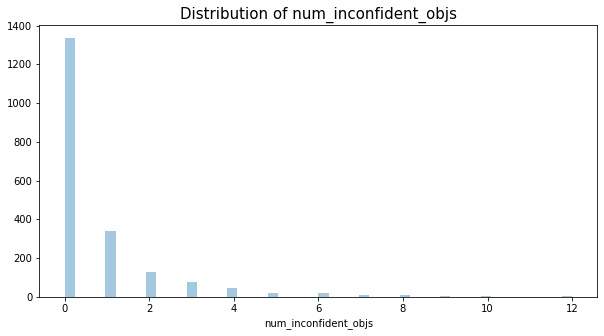

In [147]:
#num_scratch
target_element = 'num_inconfident_objs'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
#plt.hist(schema_df[target_element])
sns.distplot(schema_df[target_element], kde=False)

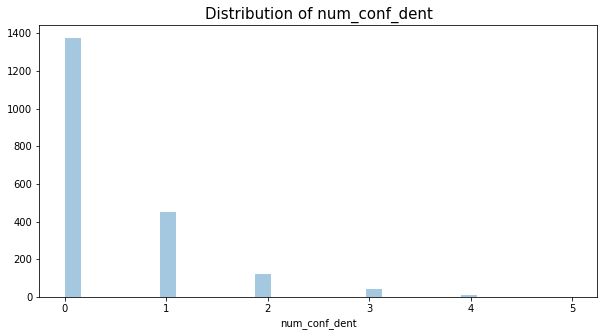

In [152]:
target_element = 'num_conf_dent'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
#plt.hist(schema_df[target_element])
sns.distplot(schema_df[target_element], kde=False)

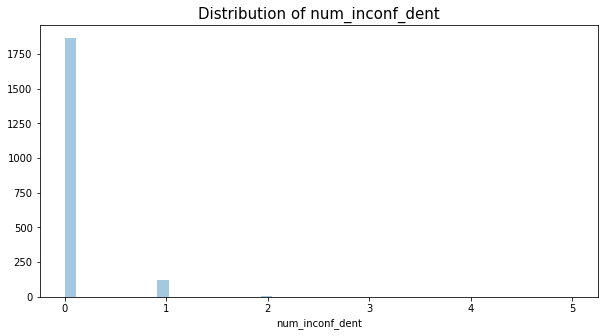

In [153]:
target_element = 'num_inconf_dent'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
#plt.hist(schema_df[target_element])
sns.distplot(schema_df[target_element], kde=False)

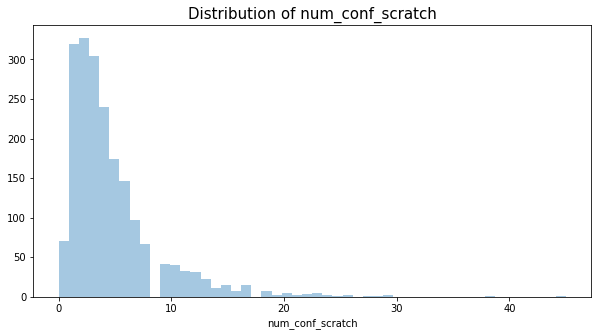

In [154]:
target_element = 'num_conf_scratch'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
#plt.hist(schema_df[target_element])
sns.distplot(schema_df[target_element], kde=False)

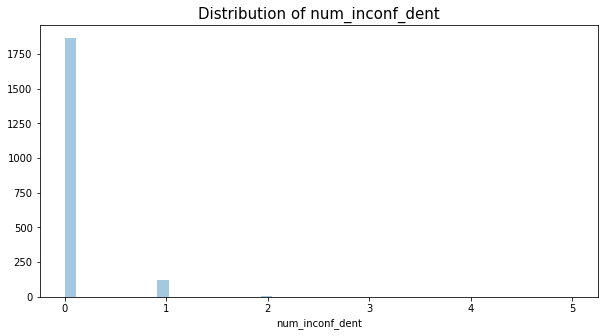

In [155]:
target_element = 'num_inconf_dent'

fig = plt.figure(figsize=(10,5))
plt.title('Distribution of ' + target_element, fontsize=15)
#plt.hist(schema_df[target_element])
sns.distplot(schema_df[target_element], kde=False)